TODO
- more images/graphs kinda B/W rn just to make more readable
- use other data that nicole gathered (more analysis and descriptive will be needed if we decide to use)
- nicole go over conclusion
- niha after ^^ other data stuff --> conclusion!!

In [43]:
import pandas as pd
import numpy as np
import researchpy as rp
import math
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg

# Table of Contents
- [Overview](#overview)
- [Names](#names)
- [Research Question](#research_question)
- [Background](#background)
- [Hypothesis](#hypothesis)
- [Datasets](#datasets)
- [Data Cleaning](#data_cleaning)
- [Data Analysis](#data_analysis)
- [Conclusion](#conclusion)

<a id='overview'></a>
# Overview 
In the book Invisible Women, the author Caroline Criado Perez discusses that “decades of research [...] show that teaching evaluation forms are worse than useless at actually evaluating teaching and are in face ‘biased against female instructors by an amount that is large and statistically significant”’ Based on this claim we plan to research student evaluations on CAPEs at UC San Diego and see if we are able to identify any biases in student expectations of women vs men professors. We are focusing the research on the variables: student average grade expected, student average grade received,  and whether the student would recommend the professor. We conducted our analysis using [insert stats tests here] in order to determine if there is a correlation between student average grade expected and received and whether the student would recommend the professor for men and women. Upon analysis,...

<a id='names'></a>
# Names
* Niharika Bhaskar
* Nicole Martindale

<a id='research_question'></a>
# Research Question
### <span style="color:DarkCyan">To what extent does a professor being a women and a profesor being a man change how students reccomend them and how students percieve the grade they expect to recieve?</span>

<a id='background'></a>
# Background

#### Why is it of interest to us

As women computer scientists who want to pursue higher education (Master's degree, PhD, etc), this is of interest to us because there are very few women who are computer science professors and learning about the explicit and implicit bias they face is important as we continue in academia. We have personally seen the benefits of women role models especially in roles like professors and teachers and we hope to bring light to these inequities. 

Imposter Syndrome is something many people face, especially women in STEM. Negative evaluations can often contribute to beliefs that can cause harm and perpetuate self-doubt. We want to bring awareness of these biases so that the ratings are not seen as the most important way of determining the efficacy of a class and especially, the professor. 


#### What background information led you to your hypothesis.

In the book Invisible Women, the author Caroline Criado Perez discusses how student expectations of women professors can create hurdles that may not be experienced if that individual was a man. Perez explains that “students are also more likely to request extensions, grade boosts, and rule-bending of female academics” (Perez 97). This expectation that women professors will be more lenient may translate into what grade students expect in the class. If this expectation is not met students may be more upset. Furthermore, in the book Perez cites that “an analysis of 14 million reviews on the website RateMyProfessors.com found that female professors are more likely to be ‘mean, ‘harsh, ‘unfair’, ‘strict’, and ‘annoying’”(Perez 97). There seems to be evidence that students do not evaluate men professors and women professors at the same standard. Consequently, there is statistically significant evidence that teaching evaluations are biased against women. In addition, there is evidence that there are significantly fewer women computer science professors and STEM departments as a whole.

#### Why is this important?
While the project may not be able to fix any explicit biases that may be present in students, identifying and being aware of any implicit biases for individuals may be beneficial. This research project may be able to suggest that there may be biases against women professors across different departments, including various STEM departments and ultimately the Computer Science department. This will hopefully motivate students to be more aware of their own actions when it comes to evaluating professors in the future. 

Ultimately, I think the project will also suggest that students and anyone referring to CAPEs and other evaluation tools should not jump to conclusions about the results of those evaluations, as there may be hidden biases against women baked into the results of those evaluations as a result of explicit and implicit biases. Ultimately, it is essential to evaluate possible inequities in evaluations to guarantee an equitable work environment for women in academia.

<a id='hypothesis'></a>
# Hypothesis
Based on the various studies cited in the book Invisible Women and extrapolating the results of those studies on the categories presented on CAPEs, we hypothesize that women professors on average will have higher grades expected from students, but will be recommended at lower rates compared to men professors.

<a id='datasets'></a>
# Dataset(s)
1. **CSE CAPE Evaluations**
    - **Name**:  cse_capes.csv
    - [Link to Data](https://docs.google.com/spreadsheets/d/1aam7pmUB-Aj1lGZQL5BjpJt1XI75cSh132YD231TY64/edit?usp=sharing)
    - **Description**: This dataset contains data on the ratings of women and men professors from within the CSE Department from the years 2007 to 2021
    - **Source**: Course and Professor Evaluation (CAPE) 
    - **Observations**:

| Variable           	                        | Description 	|
|:--------------------	                        |:-------------	|
| Rcmnd Instr           	                        | % of students who reccomend instructor       	|
| Avg Grade Expected              	                        | average grade student expected       	|
| Avg Grade Received               	                        | average grade student recieved            	|

2. **Biological Sciences CAPE Evaluations**
    - **Name**: bio_sci_capes.csv
    - [Link to Data](https://docs.google.com/spreadsheets/d/1ejbpa4pENkSDyB56eFo5WGleFBTcSHw_OTwTKmw4H20/edit?usp=sharing)
    - **Description**: This dataset contains data on the ratings of women and men professors from the biological sciences department from the years 2007 to 2021
    - **Source**: Course and Professor Evaluation (CAPE) 
    - **Observations**:

| Variable           	                        | Description 	|
|:--------------------	                        |:-------------	|
| Rcmnd Instr           	                        | % of students who reccomend instructor       	|
| Avg Grade Expected              	                        | average grade student expected       	|
| Avg Grade Received               	                        | average grade student recieved            	|

3. **Humanities CAPE Evaluations**
    - **Name**: humanities_capes.csv
    - [Link to Data](https://docs.google.com/spreadsheets/d/1RXHr4ROl9AboFbWTegWW0iDBkq5jpqzijdehjE3RSOA/edit?usp=sharing)
    - **Description**: This dataset contains data on the ratings of women and men professors from the humanities department from the years 2007 to 2021
    - **Source**: Course and Professor Evaluation (CAPE) 
    - **Observations**:

| Variable           	                        | Description 	|
|:--------------------	                        |:-------------	|
| Rcmnd Instr           	                        | % of students who reccomend instructor       	|
| Avg Grade Expected              	                        | average grade student expected       	|
| Avg Grade Received               	                        | average grade student recieved            	|


<a id='data_cleaning'></a>
# Data Cleaning

## CSE Department

In [2]:
# Split function to get grade numerical value
def split_func(x) : 
    return(float(x.split('(')[1][:-1]))

In [3]:
# Read in data for cse department
df_cse_rec = pd.read_csv("jacobs_capes/cse_capes.csv", usecols= ['Instructor','Rcmnd Instr'])
df_cse_grade = pd.read_csv("jacobs_capes/cse_capes.csv", usecols= ['Instructor','Avg Grade Expected', 'Avg Grade Received'])

# Change percent reccomend to decimal
df_cse_rec['Rcmnd Instr'] = df_cse_rec['Rcmnd Instr'].str.rstrip('%').astype('float') / 100.0

# Array with women professors
women_profs = ['Heninger, Nadia A', 'Rosing, Tajana Simunic', 'Chaudhuri, Kamalika', 'Alvarado, Christine J.', 'Minnes Kemp, Mor Mia', 'Polikarpova, Nadezhda', 'Esmaeilzadeh, Hadi', 'Riek, Laurel D', 'Gymrek, Melissa Ann', 'Chaudhuri, Kamalika', 'Nakashole, Ndapandula', 'Zaitsev, Anna L', 'Altintas De Callaf, Ilkay', 'Zhang, Yiying', 'Zhao, Jishen', 'Zhou, Yuan-Yuan']

# Drop null values
df_cse_rec = df_cse_rec.dropna()
df_cse_grade = df_cse_grade.dropna()

# Rename columns for convenience
df_cse_rec = df_cse_rec.rename(columns={"Instructor":"prof", "Rcmnd Instr":"rec_percent", "Gender": "gender"})
df_cse_grade = df_cse_grade.rename(columns={"Instructor":"prof","Avg Grade Expected": "expected", "Avg Grade Received": "received"})

# Split expected and received in order to extract grade value as decimal
df_cse_grade['value_e'] = df_cse_grade['expected'].apply(split_func)
df_cse_grade['value_r'] = df_cse_grade['received'].apply(split_func)
df_cse_grade = df_cse_grade.drop(columns=['expected', 'received'])
df_cse_grade = df_cse_grade.rename(columns={'value_e':'expected', 'value_r':'received'})

# Average out recommend percent for all classes professor has taught
df_cse_rec_avg = df_cse_rec.groupby('prof', as_index=False).mean()

#Average out expected & recieved grade for all classes professor has taught
df_cse_grade = df_cse_grade.groupby('prof', as_index=False).mean()

# Add column for gender for professor in both dataframes
df_cse_rec_avg['gender'] = np.where(df_cse_rec_avg['prof'].isin(women_profs), "W", "M")
df_cse_grade['gender'] = np.where(df_cse_grade['prof'].isin(women_profs), "W", "M")

In [4]:
df_cse_rec_avg.head()

,prof,rec_percent,gender
0,"Aksanli, Baris",1.000000,M
1,"Allos, Haytham Issa",0.815333,M
2,"Altintas De Callaf, Ilkay",0.794484,W
3,"Alvarado, Christine J.",0.975818,W
4,"Anderson, James W.",0.600000,M


In [5]:
df_cse_grade.head()

,prof,expected,received,gender
0,"Aksanli, Baris",3.180000,2.840000,M
1,"Allos, Haytham Issa",3.543333,3.268333,M
2,"Altintas De Callaf, Ilkay",3.511667,3.248333,W
3,"Alvarado, Christine J.",3.531429,3.124524,W
4,"Arsanjani, Ali Paul",3.255000,3.055000,M


## Biological Sciences Department

In [6]:
# Read in data for biological sciences department
df_bio_rec = pd.read_csv("capes/bio_sci_capes.csv", usecols= ['Instructor','Rcmnd Instr'])
df_bio_grade = pd.read_csv("capes/bio_sci_capes.csv", usecols= ['Instructor','Avg Grade Expected', 'Avg Grade Received'])


# Change percent reccomend to decimal
df_bio_rec['Rcmnd Instr'] = df_bio_rec['Rcmnd Instr'].str.rstrip('%').astype('float') / 100.0

# Array with women professors
women_profs = ['Ackerman, Susan', 'Dutton, Rachel Janelle', 'Bloodgood, Brenda Laurie', 'Butler, Madeline', 'Chilukuri, Lakshmi N', 'Cleland, Elsa Eleanor', 'Cook-Andersen, Heidi Leigh', 'Cooper, Kimberly Lynn', 'Dutton, Rachel Janelle', 'Farley, Emma Kristen', 'French, Kathleen Ann', 'Glasgow, Stacey Marie', 'Golden, Susan S.', 'Goldrath, Ananda', 'Halpain, Shelley', 'Huffaker, Alisa', 'Jin, Yishi', 'Jones, Katherine A.', 'Juavinett, Ashley Lauren', 'Karlseder, Jan', 'Kiger, Amy', 'Kurle, Carolyn M.', 'Lauberth, Shannon Marie', 'Leutgeb, Jill K.', 'Markow, Therese A.', 'McDonnell, Lisa Marie', 'Meaders, Clara Leigh', 'Mel, Stephanie', 'Niwa, Maho', 'Oegema, Karen', 'Owens, Melinda Tsao-Ying', 'Pasquinelli, Amy', 'Pekkurnaz Banghart, Gulcin', 'Petrie, Katherine Lynn','Pillus, Lorraine', 'Pogliano, Kit J.', 'Reinagel, Pam', 'Rennison, Diana', 'Smith, Laurie', 'Stockwell, Sarah R', 'Su, Chih-Ying', 'Tour, Ella', 'Troemel, Emily Ruth', 'Villa Rodriguez, Elizabeth', 'Wienhausen, Gabriele', 'Yelon, Deborah', 'Zhang, Dong-Er', 'Zuniga, Elina I']

# Drop null values
df_bio_rec = df_bio_rec.dropna()
df_bio_grade = df_bio_grade.dropna()

# Rename columns for convenience
df_bio_rec = df_bio_rec.rename(columns={"Instructor":"prof", "Rcmnd Instr":"rec_percent", "Gender": "gender"})
df_bio_grade = df_bio_grade.rename(columns={"Instructor":"prof","Avg Grade Expected": "expected", "Avg Grade Received": "received"})

# Split expected and received in order to extract grade value as decimal
df_bio_grade['value_e'] = df_bio_grade['expected'].apply(split_func)
df_bio_grade['value_r'] = df_bio_grade['received'].apply(split_func)
df_bio_grade = df_bio_grade.drop(columns=['expected', 'received'])
df_bio_grade = df_bio_grade.rename(columns={'value_e':'expected', 'value_r':'received'})

# Average out reccomend percent for all classes professor has taught
df_bio_rec_avg = df_bio_rec.groupby('prof', as_index=False).mean()

# Average out expected & recieved grade for all classes professor has taught
df_bio_grade = df_bio_grade.groupby('prof', as_index=False).mean()

# Add column for gender for professor
df_bio_rec_avg['gender'] = np.where(df_bio_rec_avg['prof'].isin(women_profs), "W", "M")
df_bio_grade['gender'] = np.where(df_bio_grade['prof'].isin(women_profs), "W", "M")

In [7]:
df_bio_rec_avg.head()

,prof,rec_percent,gender
0,"Ackerman, Susan",0.849500,W
1,"Adomako, Marie Antonia",0.943000,M
2,"Akbari, Omar Sultan",0.937200,M
3,"Alfonso, Stephanie Isabel",0.794333,M
4,"Allen, Eric",0.987357,M


In [8]:
df_bio_grade.head()

,prof,expected,received,gender
0,"Ackerman, Susan",3.670000,3.605000,W
1,"Adomako, Marie Antonia",3.350000,3.160000,M
2,"Akbari, Omar Sultan",3.442500,3.305000,M
3,"Alfonso, Stephanie Isabel",3.230000,2.826667,M
4,"Allen, Eric",3.740714,3.613571,M


## Humanities Department

In [9]:
# Read in data for biological sciences department
df_hum_rec = pd.read_csv("capes/humanities_capes.csv", usecols= ['Instructor','Rcmnd Instr'])
df_hum_grade = pd.read_csv("capes/humanities_capes.csv", usecols= ['Instructor','Avg Grade Expected', 'Avg Grade Received'])

# Change percent reccomend to decimal
df_hum_rec['Rcmnd Instr'] = df_hum_rec['Rcmnd Instr'].str.rstrip('%').astype('float') / 100.0

# Array with women professors
women_profs = ['Markman, Kristina', 'Giordano, Kailey Nicole', 'Zroka, Amy Liane', 'Boettcher, Carolin', 'Thompson, Katherine Anne Merit', 'Demetriou, Denise', 'Greene, Blythe Anastasia', 'Smarr, Janet L.', 'Caciola, Nancy A', 'Solomon, Amanda Lee Albaniel','Jed, Stephanie H', 'Bialo, Caralyn Alyssa','Lampert-Weissig, Lisa', 'Stevens, Jane', 'Steiner, Jill', 'Kugler, Emily MeriNitta']

# Drop null values
df_hum_rec = df_hum_rec.dropna()
df_hum_grade = df_hum_grade.dropna()

# Rename columns for convenience
df_hum_rec = df_hum_rec.rename(columns={"Instructor":"prof", "Rcmnd Instr":"rec_percent", "Gender": "gender"})
df_hum_grade = df_hum_grade.rename(columns={"Instructor":"prof","Avg Grade Expected": "expected", "Avg Grade Received": "received"})

# Split expected and received in order to extract grade value as decimal
df_hum_grade['value_e'] = df_hum_grade['expected'].apply(split_func)
df_hum_grade['value_r'] = df_hum_grade['received'].apply(split_func)
df_hum_grade = df_hum_grade.drop(columns=['expected', 'received'])
df_hum_grade = df_hum_grade.rename(columns={'value_e':'expected', 'value_r':'received'})

# Average out reccomend percent for all classes professor has taught
df_hum_rec_avg = df_hum_rec.groupby('prof', as_index=False).mean()

#Average out expected & recieved grade for all classes professor has taught
df_hum_grade = df_hum_grade.groupby('prof', as_index=False).mean()

# Add column for gender for professor
df_hum_rec_avg['gender'] = np.where(df_hum_rec_avg['prof'].isin(women_profs), "W", "M")
df_hum_grade['gender'] = np.where(df_hum_grade['prof'].isin(women_profs), "W", "M")

In [10]:
df_hum_rec_avg.head()

,prof,rec_percent,gender
0,"Bialo, Caralyn Alyssa",1.000000,W
1,"Boettcher, Carolin",0.889000,W
2,"Caciola, Nancy A",0.929400,W
3,"Caldwell, Michael A.",0.996750,M
4,"Caldwell, Michael Alan",0.981187,M


In [11]:
df_hum_grade.head()

,prof,expected,received,gender
0,"Bialo, Caralyn Alyssa",2.890000,2.760000,W
1,"Boettcher, Carolin",3.220000,2.990000,W
2,"Caciola, Nancy A",3.028000,2.987000,W
3,"Caldwell, Michael A.",2.870000,2.747500,M
4,"Caldwell, Michael Alan",3.093333,3.049333,M


# Data Descriptive Statistics

## CSE Department

In [12]:
df_cse_rec_avg['gender'].value_counts()

M    202
W     15
Name: gender, dtype: int64

#### CSE Recommendation

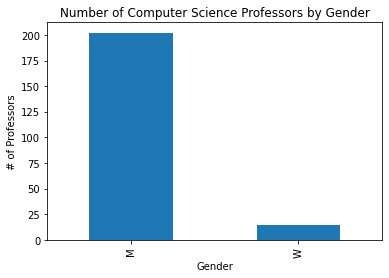

In [13]:
# Bar graphs with numbers of woman professors and men professors in CSE department
ax_cse_count = df_cse_rec_avg['gender'].value_counts().plot.bar()
plt.xlabel('Gender')
plt.ylabel('# of Professors')
ax_cse_count.set_title('Number of Computer Science Professors by Gender')
f1 = plt.gcf()

Text(0, 0.5, 'Ratio Recommend Professor')

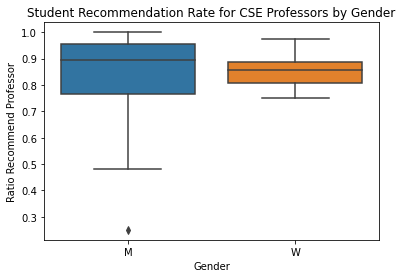

In [14]:
# Box Plots to see range of expected grades for professors base on gender
ax_cse_rec_box = sns.boxplot(x="gender", y="rec_percent", data=df_cse_rec_avg)
ax_cse_rec_box.set_title('Student Recommendation Rate for CSE Professors by Gender')
plt.xlabel('Gender')
plt.ylabel('Ratio Recommend Professor')

#### Expected vs Received Grade

Text(0, 0.5, 'Expected Grade for Professor')

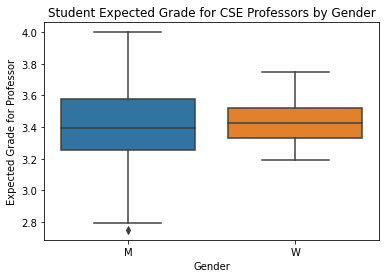

In [15]:
# Box Plots to see range of expected grades for professors base on gender
ax_cse_e_box = sns.boxplot(x="gender", y="expected", data=df_cse_grade)
ax_cse_e_box.set_title('Student Expected Grade for CSE Professors by Gender')
plt.xlabel('Gender')
plt.ylabel('Expected Grade for Professor')

Text(0, 0.5, 'Received Grade for Professor')

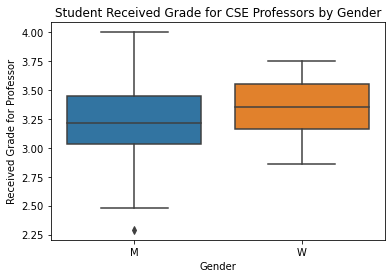

In [16]:
# Box Plots to see range of received grades for professors base on gender
ax_cse_r_box = sns.boxplot(x="gender", y="received", data=df_cse_grade)
ax_cse_r_box.set_title('Student Received Grade for CSE Professors by Gender')
plt.xlabel('Gender')
plt.ylabel('Received Grade for Professor')

Text(0, 0.5, 'Percent Difference')

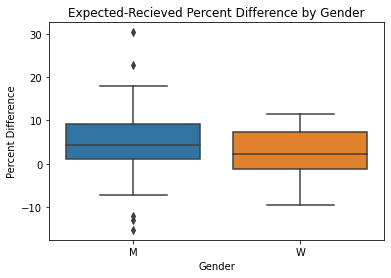

In [17]:
# Percent difference between expected - received 
df_cse_grade['per_dif'] = ((df_cse_grade['expected']-df_cse_grade['received'])/df_cse_grade['expected'])*100

# Box Plots to see range of received grades for professors base on gender
ax_cse_dif_box = sns.boxplot(x="gender", y='per_dif', data=df_cse_grade)
ax_cse_dif_box.set_title('Expected-Recieved Percent Difference by Gender')
plt.xlabel('Gender')
plt.ylabel('Percent Difference')

## Biological Sciences Department

In [18]:
df_bio_rec_avg['gender'].value_counts()

M    265
W     47
Name: gender, dtype: int64

#### Bio Recommendation


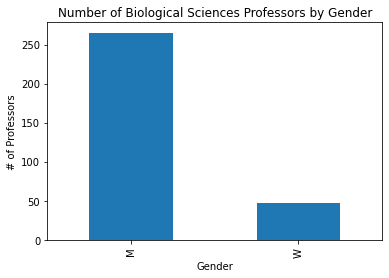

In [19]:
# Bar graphs with numbers of woman professors and men professors in Bio. Sci. department
ax_bio_count = df_bio_rec_avg['gender'].value_counts().plot.bar()
plt.xlabel('Gender')
plt.ylabel('# of Professors')
ax_bio_count.set_title('Number of Biological Sciences Professors by Gender')
f1 = plt.gcf()

Text(0, 0.5, 'Ratio Recommend Professor')

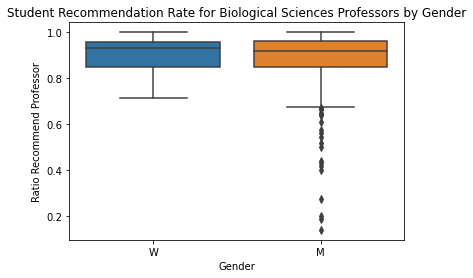

In [20]:
# Box Plots to see range of reccomendations for professors base on gender
ax_bio_rec_box = sns.boxplot(x="gender", y="rec_percent", data=df_bio_rec_avg)
ax_bio_rec_box.set_title('Student Recommendation Rate for Biological Sciences Professors by Gender')
plt.xlabel('Gender')
plt.ylabel('Ratio Recommend Professor')

#### Expected vs Received Grade

Text(0, 0.5, 'Expected Grade for Professor')

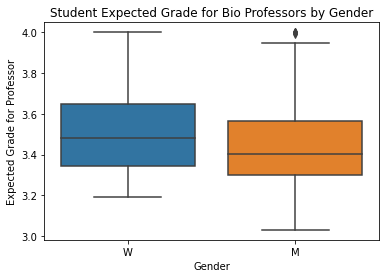

In [21]:
# Box Plots to see range of expected grades for professors base on gender
ax_bio_e_box = sns.boxplot(x="gender", y="expected", data=df_bio_grade)
ax_bio_e_box.set_title('Student Expected Grade for Bio Professors by Gender')
plt.xlabel('Gender')
plt.ylabel('Expected Grade for Professor')

Text(0, 0.5, 'Expected Grade for Professor')

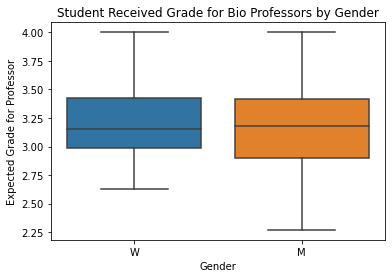

In [22]:
# Box Plots to see range of received grades for professors base on gender
ax_cse_r_box = sns.boxplot(x="gender", y="received", data=df_bio_grade)
ax_cse_r_box.set_title('Student Received Grade for Bio Professors by Gender')
plt.xlabel('Gender')
plt.ylabel('Expected Grade for Professor')

Text(0, 0.5, 'Percent Difference')

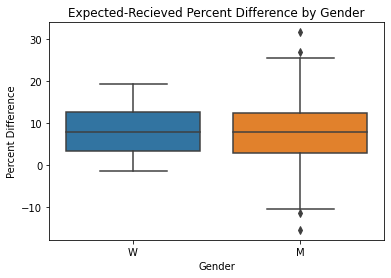

In [23]:
# Percent difference between expected - received 
df_bio_grade['per_dif'] = ((df_bio_grade['expected']-df_bio_grade['received'])/df_bio_grade['expected'])*100

# Box Plots to see range of received grades for professors base on gender
ax_bio_dif_box = sns.boxplot(x="gender", y='per_dif', data=df_bio_grade)
ax_bio_dif_box.set_title('Expected-Recieved Percent Difference by Gender')
plt.xlabel('Gender')
plt.ylabel('Percent Difference')

## Humanities Department

In [24]:
df_hum_rec_avg['gender'].value_counts()

M    28
W    16
Name: gender, dtype: int64

#### Hum Recommendation

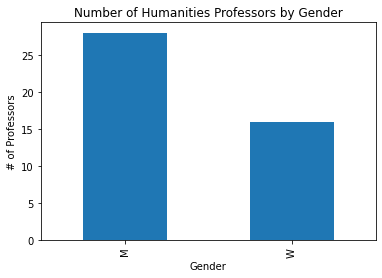

In [25]:
# Bar graphs with numbers of woman professors and men professors in Humanities department
ax_bio_count = df_hum_rec_avg['gender'].value_counts().plot.bar()
plt.xlabel('Gender')
plt.ylabel('# of Professors')
ax_bio_count.set_title('Number of Humanities Professors by Gender')
f1 = plt.gcf()

Text(0, 0.5, 'Ratio Recommend Professor')

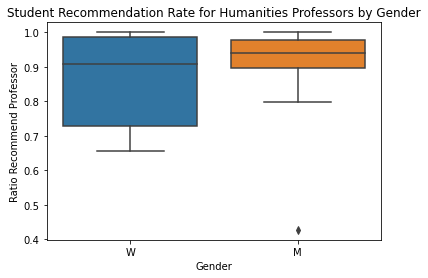

In [26]:
# Box Plots to see range of reccomendations for professors base on gender
ax_bio_rec_box = sns.boxplot(x="gender", y="rec_percent", data=df_hum_rec_avg)
ax_bio_rec_box.set_title('Student Recommendation Rate for Humanities Professors by Gender')
plt.xlabel('Gender')
plt.ylabel('Ratio Recommend Professor')

#### Expected vs Received Grade

Text(0, 0.5, 'Expected Grade for Professor')

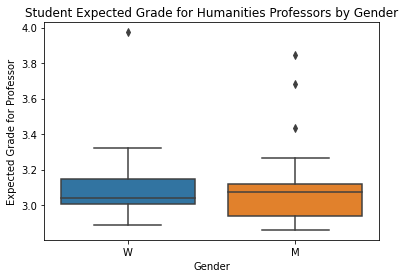

In [27]:
# Box Plots to see range of expected grades for professors base on gender
ax_hum_e_box = sns.boxplot(x="gender", y="expected", data=df_hum_grade)
ax_hum_e_box.set_title('Student Expected Grade for Humanities Professors by Gender')
plt.xlabel('Gender')
plt.ylabel('Expected Grade for Professor')

Text(0, 0.5, 'Received Grade for Professor')

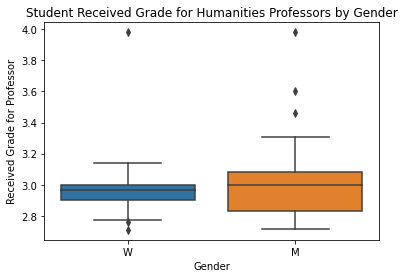

In [28]:
# Box Plots to see range of received grades for professors base on gender
ax_hum_r_box = sns.boxplot(x="gender", y="received", data=df_hum_grade)
ax_hum_r_box.set_title('Student Received Grade for Humanities Professors by Gender')
plt.xlabel('Gender')
plt.ylabel('Received Grade for Professor')

Text(0, 0.5, 'Percent Difference')

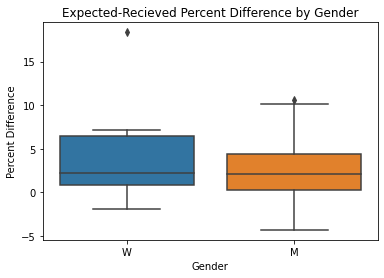

In [29]:
# Percent difference between expected - received 
df_hum_grade['per_dif'] = ((df_hum_grade['expected']-df_hum_grade['received'])/df_hum_grade['expected'])*100

# Box Plots to see range of received grades for professors base on gender
ax_hum_dif_box = sns.boxplot(x="gender", y='per_dif', data=df_hum_grade)
ax_hum_dif_box.set_title('Expected-Recieved Percent Difference by Gender')
plt.xlabel('Gender')
plt.ylabel('Percent Difference')

<a id='data_analysis'></a>
# Data Analysis


## CSE Department

### *Hypothesis Testing: T-Test Difference of Means* 

#### Recommendation Percent Rates
$H_o$: There is no difference between the recommendation rates of men and women professors

$H_a$: There is a difference between the recommendation rates of men and women professors

In [30]:
rp.ttest(group1= df_cse_rec_avg['rec_percent'][df_cse_rec_avg['gender'] == "W"], group1_name= "Woman",
         group2= df_cse_rec_avg['rec_percent'][df_cse_rec_avg['gender'] == "M"], group2_name= "Man")

(   Variable      N      Mean        SD        SE  95% Conf.  Interval
 0     Woman   15.0  0.857008  0.069371  0.017912   0.818592  0.895425
 1       Man  202.0  0.844769  0.144528  0.010169   0.824717  0.864820
 2  combined  217.0  0.845615  0.140568  0.009542   0.826807  0.864423,
             Independent t-test   results
 0  Difference (Woman - Man) =     0.0122
 1        Degrees of freedom =   215.0000
 2                         t =     0.3247
 3     Two side test p value =     0.7457
 4    Difference < 0 p value =     0.6271
 5    Difference > 0 p value =     0.3729
 6                 Cohen's d =     0.0869
 7                 Hedge's g =     0.0866
 8             Glass's delta =     0.1764
 9               Pearson's r =     0.0221)

Since we calculated the difference between women and men and the t-value was positive, the average  is greater for men professors than for women professors.

Based on the degrees of freedom the t-value would need to be greater than 1.655 to be statistically significant.

Based on the results from the t-test, the t-value is at 0.3247 < 1.655, so the difference in recommended percents for men professors and women professors is not statistically significant at the 5% level.

#### 'Expected - Received' Percent Value
$H_o$: There is no percent difference 'Expected - Received' between men and women professors

$H_a$: There is a percent difference 'Expected - Received' between men and women professors

In [31]:
rp.ttest(group1= df_cse_grade['per_dif'][df_cse_grade['gender'] == "W"], group1_name= "Woman",
         group2= df_cse_grade['per_dif'][df_cse_grade['gender'] == "M"], group2_name= "Man")

(   Variable      N      Mean        SD        SE  95% Conf.  Interval
 0     Woman   15.0  2.284417  6.359738  1.642077  -1.237488  5.806323
 1       Man  181.0  4.918007  6.290825  0.467593   3.995337  5.840677
 2  combined  196.0  4.716457  6.318767  0.451341   3.826321  5.606592,
             Independent t-test   results
 0  Difference (Woman - Man) =    -2.6336
 1        Degrees of freedom =   194.0000
 2                         t =    -1.5569
 3     Two side test p value =     0.1211
 4    Difference < 0 p value =     0.0606
 5    Difference > 0 p value =     0.9394
 6                 Cohen's d =    -0.4183
 7                 Hedge's g =    -0.4167
 8             Glass's delta =    -0.4141
 9               Pearson's r =     0.1111)

Since we calculated the difference between women and men and the t-value was negative, the average 'expected - received' percent value is greater for men professors than for women professors.

Based on the degrees of freedom the t-value would need to be less than -1.655 to be statistically significant.

However, based on the results from the t-test, the t-value is at -1.5569 > -1.655, so the difference in 'expected - received' percent value for men professors and women professors is not statistically significant at the 5% level.

## Biological Sciences Department

### *Hypothesis Testing: T-Test Difference of Means* 

#### Recommendation Percent Rates
$H_o$: There is no difference between the recommendation rates of men and women professors

$H_a$: There is a difference between the recommendation rates of men and women professors

In [32]:
rp.ttest(group1= df_bio_rec_avg['rec_percent'][df_bio_rec_avg['gender'] == "W"], group1_name= "Woman",
         group2= df_bio_rec_avg['rec_percent'][df_bio_rec_avg['gender'] == "M"], group2_name= "Man")

(   Variable      N      Mean        SD        SE  95% Conf.  Interval
 0     Woman   47.0  0.903321  0.078561  0.011459   0.880255  0.926388
 1       Man  265.0  0.874659  0.143724  0.008829   0.857275  0.892043
 2  combined  312.0  0.878977  0.136211  0.007711   0.863804  0.894150,
             Independent t-test   results
 0  Difference (Woman - Man) =     0.0287
 1        Degrees of freedom =   310.0000
 2                         t =     1.3312
 3     Two side test p value =     0.1841
 4    Difference < 0 p value =     0.9079
 5    Difference > 0 p value =     0.0921
 6                 Cohen's d =     0.2107
 7                 Hedge's g =     0.2102
 8             Glass's delta =     0.3648
 9               Pearson's r =     0.0754)

Since we calculated the difference between women and men and the t-value was positive, the average  is greater for men professors than for women professors.

Based on the degrees of freedom the t-value would need to be greater than 1.655 to be statistically significant.

Based on the results from the t-test, the t-value is at 1.3312 < 1.655, so the difference in recommended percents for men professors and women professors is not statistically significant at the 5% level.

#### 'Expected - Received' Percent Value
$H_o$: There is no percent difference 'Expected - Received' between men and women professors

$H_a$: There is a percent difference 'Expected - Received' between men and women professors

In [33]:
rp.ttest(group1= df_bio_grade['per_dif'][df_bio_grade['gender'] == "W"], group1_name= "Woman",
         group2= df_bio_grade['per_dif'][df_bio_grade['gender'] == "M"], group2_name= "Man")

(   Variable      N      Mean        SD        SE  95% Conf.  Interval
 0     Woman   46.0  8.152468  5.543288  0.817313   6.506315  9.798622
 1       Man  237.0  7.804120  7.414503  0.481624   6.855289  8.752951
 2  combined  283.0  7.860742  7.136338  0.424211   7.025720  8.695764,
             Independent t-test   results
 0  Difference (Woman - Man) =     0.3483
 1        Degrees of freedom =   281.0000
 2                         t =     0.3025
 3     Two side test p value =     0.7625
 4    Difference < 0 p value =     0.6187
 5    Difference > 0 p value =     0.3813
 6                 Cohen's d =     0.0487
 7                 Hedge's g =     0.0486
 8             Glass's delta =     0.0628
 9               Pearson's r =     0.0180)

Since we calculated the difference between women and men and the t-value was positive, the average 'expected - received' percent value is greater for women professors than for men professors.

Based on the degrees of freedom the t-value would need to be greater than 1.655 to be statistically significant.

However, based on the results from the t-test, the t-value is at 0.3025 < 1.655, so the difference in 'expected - received' percent value for men professors and women professors is not statistically significant at the 5% level.

## Humanities Department

### *Hypothesis Testing: T-Test Difference of Means* 

#### Recommendation Percent Rates
$H_o$: There is no difference between the recommendation rates of men and women professors

$H_a$: There is a difference between the recommendation rates of men and women professors

In [34]:
rp.ttest(group1= df_hum_rec_avg['rec_percent'][df_hum_rec_avg['gender'] == "W"], group1_name= "Woman",
         group2= df_hum_rec_avg['rec_percent'][df_hum_rec_avg['gender'] == "M"], group2_name= "Man")

(   Variable     N      Mean        SD        SE  95% Conf.  Interval
 0     Woman  16.0  0.868739  0.130238  0.032560   0.799339  0.938138
 1       Man  28.0  0.915534  0.110299  0.020845   0.872765  0.958304
 2  combined  44.0  0.898518  0.118636  0.017885   0.862449  0.934586,
             Independent t-test  results
 0  Difference (Woman - Man) =   -0.0468
 1        Degrees of freedom =   42.0000
 2                         t =   -1.2675
 3     Two side test p value =    0.2120
 4    Difference < 0 p value =    0.1060
 5    Difference > 0 p value =    0.8940
 6                 Cohen's d =   -0.3972
 7                 Hedge's g =   -0.3901
 8             Glass's delta =   -0.3593
 9               Pearson's r =    0.1919)

Since we calculated the difference between women and men and the t-value was negative, the average  is greater for women professors than for men professors.

Based on the degrees of freedom the t-value would need to be less than -1.68 to be statistically significant.

Based on the results from the t-test, the t-value is at -1.2675 > -1.68, so the difference in recomended percents for men professors and women professors is not statistically significant at the 5% level.

#### 'Expected - Received' Percent Value
$H_o$: There is no percent difference 'Expected - Received' between men and women professors

$H_a$: There is a percent difference 'Expected - Received' between men and women professors

In [35]:
rp.ttest(group1= df_hum_grade['per_dif'][df_hum_grade['gender'] == "W"], group1_name= "Woman",
         group2= df_hum_grade['per_dif'][df_hum_grade['gender'] == "M"], group2_name= "Man")

(   Variable     N      Mean        SD        SE  95% Conf.  Interval
 0     Woman  15.0  3.837746  4.921815  1.270807   1.112135  6.563356
 1       Man  28.0  2.564626  3.728534  0.704627   1.118852  4.010401
 2  combined  43.0  3.008738  4.169972  0.635915   1.725410  4.292066,
             Independent t-test  results
 0  Difference (Woman - Man) =    1.2731
 1        Degrees of freedom =   41.0000
 2                         t =    0.9531
 3     Two side test p value =    0.3461
 4    Difference < 0 p value =    0.8269
 5    Difference > 0 p value =    0.1731
 6                 Cohen's d =    0.3050
 7                 Hedge's g =    0.2994
 8             Glass's delta =    0.2587
 9               Pearson's r =    0.1472)

Since we calculated the difference between women and men and the t-value was positive, the average 'expected - received' percent value is greater for women professors than for men professors.

Based on the degrees of freedom the t-value would need to be greater than 1.68 to be statistically significant.

However, based on the results from the t-test, the t-value is at 0.9531 < 1.68, so the difference in 'expected - received' percent value for men professors and women professors is not statistically significant at the 5% level.

### *2-Way ANOVA* 

#### Assumptions
1. Homogeneity of variance (a.k.a. homoscedasticity)
2. Independence of observations

Our data meets these assumptions.

#### Organizing Dataframes

In [40]:
# Putting all departments in one dataframe for recommendation rate
df_cse_rec_avg['dept'] = 'cse'
df_bio_rec_avg['dept'] = 'bio'
df_hum_rec_avg['dept'] = 'hum'
frames = [df_cse_rec_avg, df_bio_rec_avg, df_hum_rec_avg]
df_rec_depts = pd.concat(frames)
df_rec_depts

,prof,rec_percent,gender,dept
0,"Aksanli, Baris",1.000000,M,cse
1,"Allos, Haytham Issa",0.815333,M,cse
2,"Altintas De Callaf, Ilkay",0.794484,W,cse
3,"Alvarado, Christine J.",0.975818,W,cse
4,"Anderson, James W.",0.600000,M,cse
...,...,...,...,...
39,"Watts, Edward J.",0.951714,M,hum
40,"Wayne, Don E.",0.427000,M,hum
41,"West, Geoffrey Scott",0.877000,M,hum
42,"Zroka, Amy Liane",0.842429,W,hum


In [49]:
# Putting all departments in one dataframe for 'expected-received' percent difference
df_cse_grade['dept'] = 'cse'
df_bio_grade['dept'] = 'bio'
df_hum_grade['dept'] = 'hum'
frames = [df_cse_grade, df_bio_grade, df_hum_grade]
df_grade_depts = pd.concat(frames)
df_grade_depts

,prof,expected,received,gender,per_dif,dept
0,"Aksanli, Baris",3.180000,2.840000,M,10.691824,cse
1,"Allos, Haytham Issa",3.543333,3.268333,M,7.761054,cse
2,"Altintas De Callaf, Ilkay",3.511667,3.248333,W,7.498813,cse
3,"Alvarado, Christine J.",3.531429,3.124524,W,11.522384,cse
4,"Arsanjani, Ali Paul",3.255000,3.055000,M,6.144393,cse
...,...,...,...,...,...,...
38,"Watts, Edward J.",3.135714,3.078571,M,1.822323,hum
39,"Wayne, Don E.",2.930000,2.820000,M,3.754266,hum
40,"West, Geoffrey Scott",3.025000,2.920000,M,3.471074,hum
41,"Zroka, Amy Liane",3.058571,2.858571,W,6.539000,hum


#### 2-way ANOVA for recommendation percent

##### Recommendation Percent Hypothesis
$H_o$: There is no difference in recommendation percent across the 3 departments (CSE, Bio, Hum)

$H_a$: There is a difference in recommendation percent across the 3 departments (CSE, Bio, Hum)

In [47]:
aov = pg.anova(dv='rec_percent', between=['dept','gender'], data=df_rec_depts)
# Pretty printing of ANOVA summary
pg.print_table(aov)


ANOVA SUMMARY

Source             SS       DF     MS        F    p-unc      np2
-------------  ------  -------  -----  -------  -------  -------
dept            0.164    2.000  0.082    4.393    0.013    0.015
gender          0.011    1.000  0.011    0.588    0.444    0.001
dept * gender   0.046    2.000  0.023    1.237    0.291    0.004
Residual       10.586  567.000  0.019  nan      nan      nan



For department we did find that there is a slightly statistically significant difference in recommendation rates (f = 4.393, p < 0.05). However, we did not find a statistically-significant difference in recommendation rates by gender (f = 0.588, p = 0.444). Lastly, the interaction between these terms was not significant.

#### 2-way ANOVA for 'expected-received' percent difference

##### Recommendation Percent Hypothesis
$H_o$: There is no difference in 'expected-received' percent across the 3 departments (CSE, Bio, Hum)

$H_a$: There is a difference in 'expected-received' percent across the 3 departments (CSE, Bio, Hum)

In [48]:
aov = pg.anova(dv='per_dif', between=['dept','gender'], data=df_grade_depts)
# Pretty printing of ANOVA summary
pg.print_table(aov)


ANOVA SUMMARY

Source                SS       DF       MS        F    p-unc      np2
-------------  ---------  -------  -------  -------  -------  -------
dept            1646.579    2.000  823.289   18.664    0.000    0.067
gender             1.817    1.000    1.817    0.041    0.839    0.000
dept * gender    114.764    2.000   57.382    1.301    0.273    0.005
Residual       22760.976  516.000   44.110  nan      nan      nan



For department we did find that there is a statistically significant difference in 'expected-received' percent rates (f = 18.664, p < 0.0001). However, we did not find any statistically-significant difference in recommendation rates by gender (f = 0.041, p = 0.839). Lastly, the interaction between these terms was not significant.

<a id='conclusion'></a>
# Conclusion

### Analysis Results

##### T-Test Difference of Means
First, for our analysis we decided to conduct a T-Test Difference of Means for all 3 departments: Computer Science and Engineering, Biological Sciences, and Humanities. We started by evaluating the data for the recommendation rates. During CAPE reviews students are asked a binary question whether or not they would recommend the professor. Afterwards CAPE provides a percentage of the number of students who recommend the professor, out of those who completed their CAPE.

With the CSE department, based on the results from the t-test, the t-value is at 0.3247 < 1.655, so the difference in recommended percent for men professors and women professors is not statistically significant at the 5% level. Next, with the Bio department, based on the results from the t-test, the t-value is at 1.3312 < 1.655, so the difference in recommended percent for men professors and women professors is also not statistically significant at the 5% level. Lastly, with the Humanities department, based on the results from the t-test, the t-value is at -1.2675 > -1.68, so the difference in recommended percent for men professors and women professors is not statistically significant at the 5% level. It is interesting to see that while being statistically insignificant, for the CSE and Bio department the results actually demonstrated that students recommend women professors at higher rates. While for the Humanities department, which also does not have statistically significant results, students’ recommended women professors at lower rates. Regardless, none of the tests ended up being statistically significant, therefore there does not seem to be a difference in recommendation rates. In conclusion, our hypothesis was incorrect for this series of tests.

Secondly, for our analysis we again decided to conduct a T-Test Difference of Means, this time for the 'expected-received' percentage value for all 3 departments: Computer Science and Engineering, Biological Sciences, and Humanities. During CAPE reviews, students are asked what grade they expect to receive in the class and then CAPE conglomerates that information, averages it, and reports it as the expected grade value. Then after the quarter, CAPE averages the grades received for all students. We decided to compare these values and evaluated the percent difference according to the expected value, as we hypothesized that students will expect a higher grade than they may receive from women professors.

For the CSE department, based on the results from the t-test, the t-value is at -1.5569 > -1.655, so the difference in 'expected - received' percent value for men professors and women professors is not statistically significant at the 5% level. Secondly, for the Bio department, based on the results from the t-test, the t-value is at 1.3312 < 1.655, so the difference in recommended percent for men professors and women professors is also not statistically significant at the 5% level. Lastly, for the Humanities Department, based on the results from the t-test, the t-value is at 0.9531 < 1.68, so the difference in 'expected - received' percent value for men professors and women professors is also not statistically significant at the 5% level. However, it is interesting to see that, even though it is not statistically significant, for the CSE department it seems like in general students expect to get lower grades in classes with women professors than with men professors.

##### 2-way ANOVA
Next, for our analysis we decided to conduct a 2-way ANOVA in order estimate how the mean of our quantitative variables (Recommendation Percent & 'Expected-Received' percent) changed according to the levels of our categorical variables (gender and department).

First, for recommendation percent; we found that for department there does seem to be a slightly statistically significant difference in recommendation rates (f = 4.393, p < 0.05). This suggests that across departments there seems to be a difference in how students recommend both women and men professors. However, we did not find a statistically significant difference in recommendation rates by gender (f = 0.588, p = 0.444). This implies that across genders there does not seem to be a difference in how students recommend both women and men professors. Lastly, the interaction between these terms (gender and department) was not significant. This indicates when taking into account both quantitative variables there is not a statistically significant difference when comparing gender and department.

##### <span style="color:blue">TODO: MAYBE INCLUDE ONE OF THOSE normal distrubition charts with all departments</span>

Then, for 'expected - received' percent; we found that for department there does not seem to be a statistically significant difference in 'expected-received' percent rates (f = 18.664, p < 0.0001). This suggests that across departments there does not seem to be a difference in what students expect to get as grade versus what is received. In addition, we did not find any statistically significant difference in recommendation rates by gender (f = 0.041, p = 0.839). Suggesting, that when comparing men and women professors there does not seem to be a difference in what students expect to get as grade versus what is received. Lastly, the interaction between these terms was not significant. This indicates when taking into account both quantitative variables there is not a statistically significant difference when comparing gender and department.

##### <span style="color:blue">TODO: MAYBE INCLUDE ONE OF THOSE normal distrubition charts with all departments</span>


### Concerns

Throughout our analysis and research, we came upon many concerns. While we were not able to address all the concerns we had, we have noted them here and hope to address them in future iterations of this project.

First, when categorizing professors by gender, we recognize that doing this is problematic in some sense. Gender is considered a continuum and deciding what being a woman means, what being a man, or what being non-binary means is up to the individual. We decided to keep our project focused on the binary due to data constraints. In order to determine whether a professor was a man or a woman we looked at names and pictures and used what society may deem as woman and man to categorize people. As researchers, we recognize that a way to avoid doing this would be to send out surveys to professors and receive the information from the professor themselves, however we could not do this due to time constraints. Therefore, in a future iteration of this project, ideally, we would collect gender identity from each professor individually or through reputable records.


Then, not all students fill out their CAPEs. This causes multiple issues. First, it limits our sample size, especially regarding variables like recommendation rates. In addition, for the quantitative variables we chose to evaluate it severely skews how students would recommend the professor, as only the students willing to fill out CAPEs are reporting. There may be many motives and biases for students who do fill out their CAPEs. For example, students may be upset about a class and therefore may be motivated to fill CAPEs out accordingly. Additionally, there is an issue in comparing expected and received. Since not all students usually fill out CAPEs, comparing the expected and received uses different groups of students. Expected grade is calculated using a smaller subset of the received group. There are other factors to take into account, for example it is unlikely that students who expect to receive a failing grade would report that they expect to fail the class. Therefore, in a future iteration of this project, ideally, we would normalize the data and take into account the multiple confounding variables discussed.

Next, for our analysis we grouped the CAPE results over a period of time. It is likely that professors have improved over time so grouping the results may skew results. In addition, in [The Dynamics of Discrimination: Theory and Evidence](https://www.aeaweb.org/articles?id=10.1257/aer.20171829) the authors hypothesize evaluators (students, other faculty) may rate women instructors worse on average, and may rate a novice instructor more poorly holding all else in the course constant. Regarding a novice woman instructor, the students/other faculty may have some evidence about their ability, but not much, and their 'reputation' is quite low. However, suppose evaluators know there is bias against women instructors. Then advanced women instructors may have superior evaluations over their men counterparts. This initial discrimination somewhat backfires, according to the paper, so those who make it to the advanced level are perceived as more capable. Taking into account this research, and applying that same theory to our data, using the data for a professor over time may be a poor indication of gender differences as women professors may be rated worse initially and then better later on.
    
On the same note, for our data we conglomerated the data by every professor. This means that we also combined and averaged the data regardless of what class the professor taught. This introduces some problems as some classes are naturally more challenging and some classes are naturally less challenging, and the rating the professor receives may reflect this.
    
Similarly, as we only have access to conglomerated data reported by CAPEs, we do not have access to individual students' CAPE information and grades. Therefore, it is hard to make definitive conclusions without information like standard deviation and other statistics.

All in all, there are many concerns that we had throughout completing our research. Although we recognize this may be challenging without access to the necessary data, in future iterations of this project we hope to address the things discussed here.